# Завдання: Створюємо фільтр розмиття для зображення

У цьому завданні ми реалізуємо простий фільтр розмиття для зображення, використовуючи тільки NumPy для обробки та Pillow для завантаження і візуалізації зображення.

## Крок 1: Імпортуємо потрібні бібліотеки

```python
import numpy as np
from PIL import Image
```

## Крок 2: Створюємо функцію apply_blur

Ось базова структура функції, яку вам потрібно заповнити:

```python
def apply_blur(image_array, kernel_size=3):
    # Ваш код тут
    return blurred_image
```

### Підказки для реалізації:

1. **Створення ядра розмиття:**
   - Використовуйте `np.ones()` для створення квадратної матриці заданого розміру.
   - Нормалізуйте ядро, розділивши його на суму всіх елементів.
   - Чому?: Ядро визначає, як кожен піксель буде змішуватися з сусідніми.

2. **Підготовка зображення:**
   - Створіть відступи навколо зображення, щоб обробити крайові пікселі.
   - Використовуйте `np.pad()` з режимом 'edge' або 'reflect'.
   - Чому?: Це дозволить застосувати фільтр до всіх пікселів, включаючи крайові.

3. **Застосування фільтра:**
   - Використовуйте цикли для проходу по кожному пікселю зображення.
   - Для кожного пікселя застосуйте ядро розмиття до околиці пікселя.
   - Підказка: Використовуйте зрізи масиву та `np.sum()` для обчислення нового значення пікселя.

4. **Обробка кольорових каналів:**
   - Не забудьте обробити кожен кольоровий канал окремо.
   - Чому?: RGB зображення мають три канали, які потрібно обробляти незалежно.

5. **Нормалізація результату:**
   - Переконайтеся, що значення пікселів залишаються в діапазоні 0-255.
   - Використовуйте `np.clip()` для обмеження значень.

## Крок 3: Використання функції

Використовуйте наступний код для завантаження зображення, застосування фільтра та відображення результату:

```python
# Завантаження зображення за допомогою PIL
image = Image.open('your_image_path.jpg')  # Вкажіть шлях до вашого зображення
image_array = np.array(image)

# Застосування фільтра розмиття
blurred_image_array = apply_blur(image_array, kernel_size=5)  # Можна змінювати розмір ядра

# Створення нового зображення з отриманого масиву
blurred_image = Image.fromarray(blurred_image_array.astype('uint8'))

# Показ зображення
blurred_image.show()
```

## Додаткові підказки:

- Пам'ятайте, що зображення в NumPy представлені як 3D масиви форми (висота, ширина, 3), де 3 - це канали RGB.
- Більший розмір ядра призведе до сильнішого розмиття, але збільшить час обробки.
- Зверніть увагу на типи даних: переконайтеся, що ви працюєте з цілими числами в діапазоні 0-255.
- Для оптимізації продуктивності розгляньте можливість використання векторизованих операцій NumPy замість явних циклів, якщо зможете.

Спробуйте реалізувати функцію `apply_blur` самостійно, використовуючи ці підказки. Експериментуйте з різними розмірами ядра та зображеннями. Удачі з програмуванням!


In [ ]:
import numpy as np
from PIL import Image

In [ ]:
# Функція для застосування фільтра розмиття
def apply_blur(image_array, kernel_size=3):
    # Створюємо ядро розмиття
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Визначаємо розміри зображення
    height, width, channels = image_array.shape
    
    # Створюємо копію зображення для зберігання результату
    blurred_image = np.zeros_like(image_array)
    
    # Додаємо відступи навколо зображення
    padded_image = np.pad(image_array, ((kernel_size // 2, kernel_size // 2),
                                        (kernel_size // 2, kernel_size // 2),
                                        (0, 0)), mode='reflect')
    
    # Проходимо по кожному пікселю зображення
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                # Застосовуємо фільтр розмиття для кожного пікселя і кожного каналу окремо
                region = padded_image[y:y + kernel_size, x:x + kernel_size, c]
                blurred_image[y, x, c] = np.sum(region * kernel)
    
    # Переконуємось, що значення пікселів в діапазоні 0-255
    blurred_image = np.clip(blurred_image, 0, 255)
    
    return blurred_image

In [ ]:
# Завантаження зображення для тестування
image = Image.open('sam.jpg')  # Тестове зображення
image_array = np.array(image)

In [ ]:
# Застосовуємо фільтр розмиття
blurred_image_array = apply_blur(image_array, kernel_size=5)

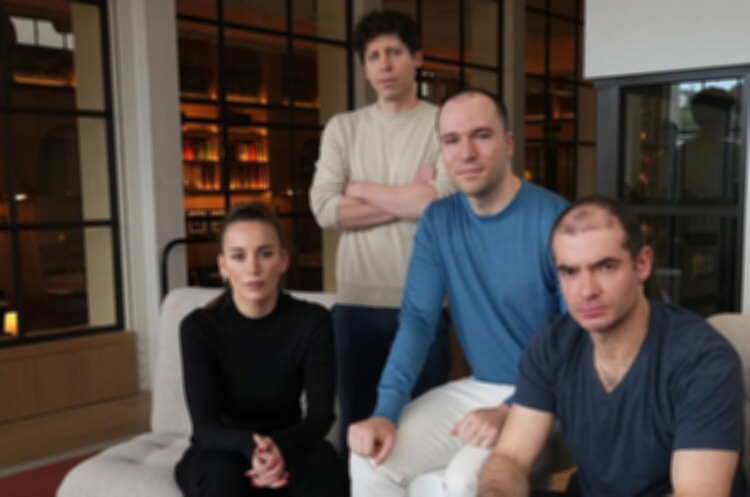

In [3]:
# Перетворюємо масив в зображення та зберігаємо результат
blurred_image = Image.fromarray(blurred_image_array.astype('uint8'))
blurred_image